1.	Download two CSV files and place them in the data folder of your local Data Question 1 repository:
a. Gross Domestic Product (GDP) per capita: http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD
o	DO NOT APPLY ANY FILTERS
o	rename the file to gdp_per_capita.csv
o	open it with a text editor (not Excel) and take a look
b. Percentage of Individuals using the Internet: http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H
o	DO NOT APPLY ANY FILTERS
o	rename the file to internet_use.csv
o	open it with a text editor (not Excel) and take a look



2.	Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

4.	At the bottom of your imports cell, use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

5.	Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
o	Take a look at the first 10 rows.
o	Look at the last 5 rows. Do you see a problem?
o	Redo the read_csv() call to correct this issue - do not modify the original csv file.


In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6868) # last intended index + 1
# the argument skipfooter=2 could also work


In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [5]:
gdp_df['Country or Area'].value_counts()

Rwanda                                           30
Europe & Central Asia (excluding high income)    30
Sierra Leone                                     30
Bhutan                                           30
Grenada                                          30
                                                 ..
Nauru                                            16
Cayman Islands                                   13
Sint Maarten (Dutch part)                        10
Turks and Caicos Islands                          9
Djibouti                                          7
Name: Country or Area, Length: 238, dtype: int64

6.	Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [6]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [7]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [8]:
gdp_df.tail()

,Country or Area,Year,Value
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094
6867,Zimbabwe,1990,3324.348171


In [9]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


7.	How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [12]:
# gdp_df['Year'].astype(int): convert data type to integer

8.	Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [13]:
gdp_df.Year.value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

In [14]:
gdp_df.Year.unique()

# unique is better than .tolist() and .value_counts() because it puts everything in a list

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

<AxesSubplot:>

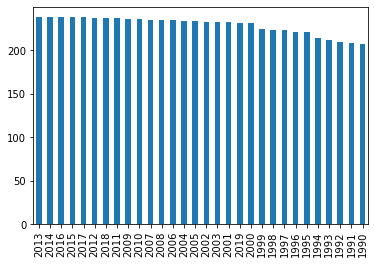

In [15]:
year = gdp_df.Year.value_counts()
year.plot(kind = 'bar') # For bar plot we usually need value counts

9.	How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [16]:
gdp_df.Country.nunique()

238

In [17]:
len(gdp_df.Country.unique()) 
# unique gives us a list. we want to count the elements of a list,
#so we use nunique.

238

In [18]:
# len does the same things (as nunique) for counting the number of elements in a list

10.	Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [19]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014].reset_index(drop = True) # make a new data drame

In [20]:
#gdp_2014= gdp_df[gdp_df['Year'].isin([2014])]. isin can be used for == too

In [21]:
gdp_2014

,Country,Year,GDP_Per_Capita
0,Afghanistan,2014,2102.385234
1,Albania,2014,11623.866679
2,Algeria,2014,11512.705405
3,Angola,2014,8239.828837
4,Antigua and Barbuda,2014,18104.241470
...,...,...,...
233,Vietnam,2014,6098.489609
234,West Bank and Gaza,2014,5967.073437
235,World,2014,15189.648507
236,Zambia,2014,3450.046561


11.	Use .describe() to find the summary statistics for GDP per capita in 2014.


In [22]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


12.	Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

Text(0.5, 0, 'GPD')

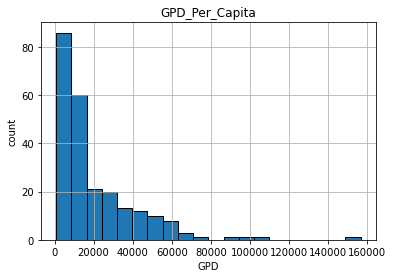

In [23]:
gdp_2014.GDP_Per_Capita.hist(bins = 20, edgecolor = 'black')
plt.title('GPD_Per_Capita')
plt.ylabel('count')
plt.xlabel('GPD')

In [24]:
# Right skewed: tail is to the right. with some outliers to the right

13.	Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [25]:
gdp_2014.sort_values('GDP_Per_Capita').head() 
# one way to find the largest values is to sort beforehand

,Country,Year,GDP_Per_Capita
36,Central African Republic,2014,822.610458
28,Burundi,2014,886.235777
130,Malawi,2014,1027.208496
49,Dem. Rep. Congo,2014,1029.790785
156,Niger,2014,1127.615541


In [26]:
gdp_2014.nlargest(5,'GDP_Per_Capita')
# a second way to find the largest values is to use nsmallest

,Country,Year,GDP_Per_Capita
128,"Macao SAR, China",2014,156514.133850
127,Luxembourg,2014,108760.916030
177,Qatar,2014,95578.416973
189,Singapore,2014,87808.663157
19,Bermuda,2014,77361.104881


In [27]:
gdp_2014.sort_values(by = 'GDP_Per_Capita').tail() # to find the buttom values first sort values 

,Country,Year,GDP_Per_Capita
19,Bermuda,2014,77361.104881
189,Singapore,2014,87808.663157
177,Qatar,2014,95578.416973
127,Luxembourg,2014,108760.916030
128,"Macao SAR, China",2014,156514.133850


In [28]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
36,Central African Republic,2014,822.610458
28,Burundi,2014,886.235777
130,Malawi,2014,1027.208496
49,Dem. Rep. Congo,2014,1029.790785
156,Niger,2014,1127.615541


14.	Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [29]:
gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')[1990] #series

Country
Afghanistan                     NaN
Albania                 4842.734635
Algeria                 8746.352901
Angola                  5783.429064
Antigua and Barbuda    15459.551675
                           ...     
Vietnam                 1673.249634
West Bank and Gaza              NaN
World                   9680.269697
Zambia                  2190.182814
Zimbabwe                3324.348171
Name: 1990, Length: 238, dtype: float64

In [30]:
gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')[[1990]] # data frame

Year,1990
Country,
Afghanistan,NaN
Albania,4842.734635
Algeria,8746.352901
Angola,5783.429064
Antigua and Barbuda,15459.551675
...,...
Vietnam,1673.249634
West Bank and Gaza,NaN
World,9680.269697


In [31]:
gdp_pivoted = gdp_df.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')[[1990, 2017]].dropna() # bracket gives a data drame into specific columns

In [32]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


In [33]:
gdp_pivoted = pd.pivot_table(gdp_df[gdp_df['Year'].isin([1990, 2017])],values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()
gdp_pivoted
 # a second way to do pivot table and for specific columns

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


In [34]:
# a third way to do pivot table, not using isin but using | (or)

gdp_pivoted = gdp_df[(gdp_df['Year']== 1990) | (gdp_df['Year'] == 2017 )].pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()
gdp_pivoted



Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


15.	Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [35]:
gdp_pivoted['Percent_change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [36]:
gdp_pivoted

Year,1990,2017,Percent_change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


16.	How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [37]:
gdp_pivoted[gdp_pivoted['Percent_change'] < 0].sort_values('Percent_change')

Year,1990,2017,Percent_change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
United Arab Emirates,111454.360446,67183.626557,-39.720953
Burundi,1184.842440,773.571858,-34.710993
Ukraine,15751.722440,11871.123624,-24.636028
Central African Republic,1201.677234,912.802052,-24.039332
Tajikistan,3869.043636,3089.530208,-20.147445
Gabon,18179.265733,15006.764091,-17.451209
Congo,5115.210903,4274.296414,-16.439488
Madagascar,1853.051624,1584.422678,-14.496571


In [38]:
len(gdp_pivoted[gdp_pivoted['Percent_change'] < 0].sort_values('Percent_change'))

17

17.	Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.


In [39]:
gdp_pivoted.nlargest(2, 'Percent_change')

Year,1990,2017,Percent_change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281


In [40]:
gdp_df[gdp_df['Country'] == 'Equatorial Guinea']

,Country,Year,GDP_Per_Capita
1754,Equatorial Guinea,2019,18558.003852
1755,Equatorial Guinea,2018,20359.845144
1756,Equatorial Guinea,2017,22551.083246
1757,Equatorial Guinea,2016,24827.072978
1758,Equatorial Guinea,2015,28313.602763
1759,Equatorial Guinea,2014,32436.466793
1760,Equatorial Guinea,2013,33678.706547
1761,Equatorial Guinea,2012,36671.357436
1762,Equatorial Guinea,2011,35378.023284
1763,Equatorial Guinea,2010,34732.255956


In [41]:
gdp_equatorial = gdp_df[gdp_df['Country'] == 'Equatorial Guinea']

In [42]:
gdp_china = gdp_df[gdp_df['Country'] == 'China']

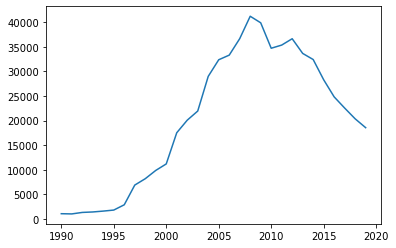

In [43]:
plt.plot(gdp_equatorial['Year'], gdp_equatorial['GDP_Per_Capita'])


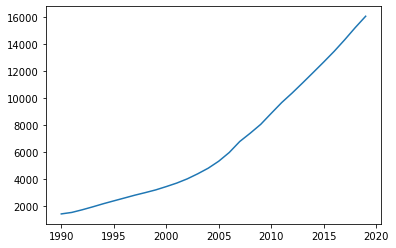

In [44]:
plt.plot(gdp_china['Year'], gdp_china['GDP_Per_Capita'])


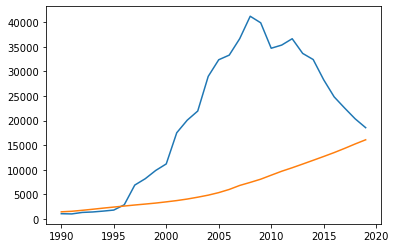

In [45]:
plt.plot(gdp_equatorial['Year'], gdp_equatorial['GDP_Per_Capita'])
plt.plot(gdp_china['Year'], gdp_china['GDP_Per_Capita'])


18.	Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [46]:
continents= pd.read_csv('../data/continents.csv')

In [47]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19.	Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [48]:
gdp_df = pd.merge(left = gdp_df, 
         right = continents)

In [49]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia


In [50]:
gdp_df.isna().any()

Country           False
Year              False
GDP_Per_Capita    False
Continent         False
dtype: bool

In [51]:
gdp_df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [52]:
gdp_df['Continent'].nunique()

6

In [53]:
gdp_df.groupby('Continent')['Country'].unique()

Continent
Africa           [Algeria, Angola, Benin, Botswana, Burkina Fas...
Asia             [Afghanistan, Bahrain, Bangladesh, Bhutan, Bru...
Europe           [Albania, Armenia, Austria, Azerbaijan, Belaru...
North America    [Antigua and Barbuda, Aruba, Barbados, Belize,...
Oceania          [Australia, Fiji, Kiribati, Marshall Islands, ...
South America    [Argentina, Bolivia, Brazil, Chile, Colombia, ...
Name: Country, dtype: object

20.	Determine the number of countries per continent. Create a bar chart showing this.

<AxesSubplot:xlabel='Continent'>

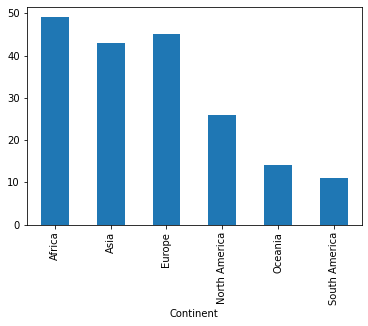

In [54]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar')


In [55]:
gdp_df.groupby('Continent').agg({'Country':'nunique'})

,Country
Continent,
Africa,49
Asia,43
Europe,45
North America,26
Oceania,14
South America,11


In [56]:
# unique().count() = nunique()

In [57]:
#aggregation needs a numeric variable. Otherwise, strings will give error

21.	Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [58]:
gdp_2014= gdp_df[gdp_df['Year'] == 2014]

In [59]:
gdp_2014.groupby('Continent')['GDP_Per_Capita'].agg('count')

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: GDP_Per_Capita, dtype: int64

<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

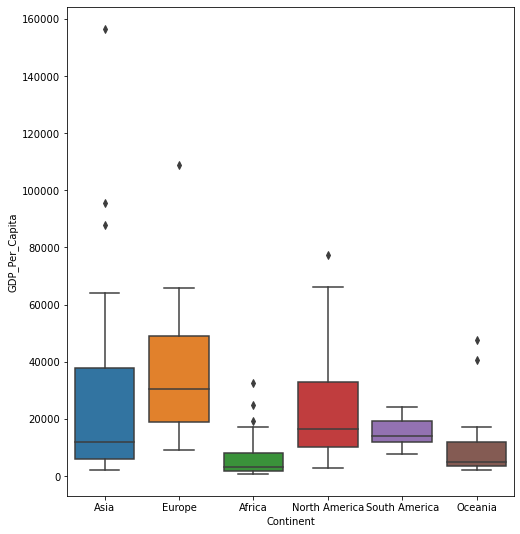

In [60]:
plt.figure(figsize = (8, 9))

sns.boxplot(x = gdp_2014['Continent'], y = gdp_2014['GDP_Per_Capita'])

22.	Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [61]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines = False, warn_bad_lines = False)

In [62]:
internet_df.Year.value_counts()

1990                                                              210
2011                                                              207
2007                                                              206
2008                                                              204
2010                                                              203
                                                                 ... 
Refers only to users with access to the international network.      1
Estimation based on GPRS subscribers, fixed and mobile.             1
Estimate based on survey's results. Population age 15+.             1
Population age 18+.                                                 1
All persons aged 10 and over                                        1
Name: Year, Length: 223, dtype: int64

23.	Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [63]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [64]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']


In [65]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


24.	How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [66]:
internet_df.shape

(4675, 3)

25.	What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [67]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values(by = 'Year', ascending = True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


In [68]:
# it was already sorted: not needs ascending argument

26.	Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.



In [69]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4675 non-null   object 
 1   Year                4675 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 109.7+ KB


In [70]:
pd.options.display.max_rows = 100 # increase number of rows to see. Do this for every notebook

In [71]:
pd.options.display.max_columns = 20 # max no of columns

In [72]:
pd.options.display.max_colwidth = 50 # no of characters

In [73]:
internet_df.tail(200)

,Country,Year,Internet_Users_Pct
4475,Zimbabwe,2012,17.09
4476,Zimbabwe,2011,15.70
4477,Zimbabwe,2010,11.50
4478,Zimbabwe,2009,11.36
4479,Zimbabwe,2008,11.40
...,...,...,...
4670,175,Includes individuals 3 years and older,NaN
4671,176,NTIA/CPS survey.,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN
4673,179,Preliminary. Country estimate.,NaN


In [74]:
internet_df = internet_df.drop(internet_df.index[4495:]) # get rid of rows with invalid values

In [75]:
internet_df.iloc[:4495] # a second way to do it # select the index 0 tp 4495

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [76]:
internet_df[:4495] # a third way to do it. You can take the .iloc out just in the same way you can take loc out. 

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [77]:
# loc looks at lables. Iloc looks at real indices (behind). 

In [78]:
internet_df.tail()

,Country,Year,Internet_Users_Pct
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


In [79]:
internet_df['Year'] = internet_df['Year'].astype('int')

In [80]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5443 non-null   object 
 1   Year            5443 non-null   int64  
 2   GDP_Per_Capita  5443 non-null   float64
 3   Continent       5443 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


In [81]:
gdp_and_internet_use = pd.merge(left = internet_df, right = gdp_df, on = ['Country', 'Year'])

gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita,Continent
0,Afghanistan,2014,6.390000,2102.385234,Asia
1,Afghanistan,2013,5.900000,2116.465454,Asia
2,Afghanistan,2012,5.454545,2075.491747,Asia
3,Afghanistan,2011,5.000000,1904.559799,Asia
4,Afghanistan,2010,4.000000,1957.029338,Asia
...,...,...,...,...,...
3453,Zimbabwe,1997,0.033080,3580.048793,Africa
3454,Zimbabwe,1996,0.016790,3520.430146,Africa
3455,Zimbabwe,1995,0.007684,3226.413930,Africa
3456,Zimbabwe,1994,0.001739,3263.934978,Africa


In [82]:
gdp_and_internet_use = pd.merge(left =gdp_df, right = internet_df)

Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [108]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dem. Rep. Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong K

In [84]:
internet_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Rep.', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Dem. People's Rep. of Korea", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guia

In [85]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,Asia,6.390000
1,Afghanistan,2013,2116.465454,Asia,5.900000
2,Afghanistan,2012,2075.491747,Asia,5.454545
3,Afghanistan,2011,1904.559799,Asia,5.000000
4,Afghanistan,2010,1957.029338,Asia,4.000000


In [86]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3453,Zimbabwe,1997,3580.048793,Africa,0.033080
3454,Zimbabwe,1996,3520.430146,Africa,0.016790
3455,Zimbabwe,1995,3226.413930,Africa,0.007684
3456,Zimbabwe,1994,3263.934978,Africa,0.001739
3457,Zimbabwe,1990,3324.348171,Africa,0.000000


In [87]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,Asia,6.39
13,Albania,2014,11623.866679,Europe,60.10
34,Algeria,2014,11512.705405,Africa,18.09
56,Angola,2014,8239.828837,Africa,21.26
76,Antigua and Barbuda,2014,18104.241470,North America,64.00
...,...,...,...,...,...
3351,Uruguay,2014,20582.168953,South America,61.46
3373,Uzbekistan,2014,5764.492705,Asia,43.55
3394,Vanuatu,2014,3116.077025,Oceania,18.80
3414,Zambia,2014,3450.046561,Africa,17.34


In [88]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90] # this sorts based on percentage automatically

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
228,Bahrain,2014,48201.085018,Asia,90.99998
372,Bermuda,2014,77361.104881,North America,96.80000
854,Denmark,2014,52214.537753,Europe,95.99000
1053,Finland,2014,45013.100455,Europe,92.38000
1381,Iceland,2014,49652.149500,Europe,98.16000
1564,Japan,2014,39376.884505,Asia,90.58000
1798,Luxembourg,2014,108760.916030,Europe,94.67000
2185,Netherlands,2014,52353.666990,Europe,93.17000
2296,Norway,2014,62589.373548,Europe,96.30000
2542,Qatar,2014,95578.416973,Asia,91.49000


In [89]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90].shape

(13, 5)

In [90]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90].sort_values(by='GDP_Per_Capita', ascending=False).head(3) 
# this adds an aditional sort. Since we are only intrested in the top 3 countries, we used .head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1798,Luxembourg,2014,108760.916030,Europe,94.67
2542,Qatar,2014,95578.416973,Asia,91.49
372,Bermuda,2014,77361.104881,North America,96.80


In [91]:
#internet_df[internet_df['Country'] == ['Luxembourg', 'Qatar', 'Bermuda']] # not work because it looks for a list

In [92]:
three_countries = internet_df[internet_df['Country'].isin(['Luxembourg', 'Qatar', 'Bermuda'])]

In [93]:
three_countries.head()

,Country,Year,Internet_Users_Pct
415,Bermuda,2014,96.800000
416,Bermuda,2013,95.300000
417,Bermuda,2012,91.299305
418,Bermuda,2011,88.336000
419,Bermuda,2010,84.210000


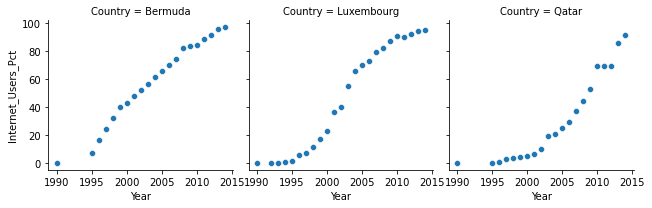

In [94]:
grid = sns.FacetGrid(three_countries, col='Country')
grid.map(sns.scatterplot, 'Year', 'Internet_Users_Pct'); # ; gets rid of first line of the plot

In [95]:
#internet_df[['Luxembourg', 'Qatar', 'Bermuda']] This would not work because there are not columns/rows. there are just values 

In [96]:
#sns.scatterplot(data=gdp_and_internet_use_2014, x='GDP_Per_Capita', y='Internet_Users_Pct', s = 'Country')

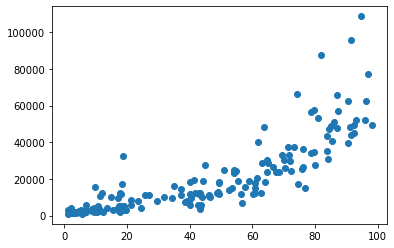

In [97]:
plt.scatter(data =gdp_and_internet_use_2014, x = 'Internet_Users_Pct', y = 'GDP_Per_Capita' )

In [98]:
gdp_and_internet_use_2014[['GDP_Per_Capita','Internet_Users_Pct' ]].corr() # strong positive

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.824627
Internet_Users_Pct,0.824627,1.000000


In [100]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log
0,Afghanistan,2014,2102.385234,Asia,6.39,7.650828
13,Albania,2014,11623.866679,Europe,60.10,9.360816
34,Algeria,2014,11512.705405,Africa,18.09,9.351207
56,Angola,2014,8239.828837,Africa,21.26,9.016735
76,Antigua and Barbuda,2014,18104.241470,North America,64.00,9.803902
...,...,...,...,...,...,...
3351,Uruguay,2014,20582.168953,South America,61.46,9.932180
3373,Uzbekistan,2014,5764.492705,Asia,43.55,8.659472
3394,Vanuatu,2014,3116.077025,Oceania,18.80,8.044330
3414,Zambia,2014,3450.046561,Africa,17.34,8.146143


In [99]:
gdp_and_internet_use_2014['log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

<ipython-input-99-08de2465f291>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [101]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,log
0,Afghanistan,2014,2102.385234,Asia,6.39,7.650828
13,Albania,2014,11623.866679,Europe,60.10,9.360816
34,Algeria,2014,11512.705405,Africa,18.09,9.351207
56,Angola,2014,8239.828837,Africa,21.26,9.016735
76,Antigua and Barbuda,2014,18104.241470,North America,64.00,9.803902
...,...,...,...,...,...,...
3351,Uruguay,2014,20582.168953,South America,61.46,9.932180
3373,Uzbekistan,2014,5764.492705,Asia,43.55,8.659472
3394,Vanuatu,2014,3116.077025,Oceania,18.80,8.044330
3414,Zambia,2014,3450.046561,Africa,17.34,8.146143


In [102]:
gdp_df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dem. Rep. Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong K

In [106]:
USA = gdp_and_internet_use[gdp_and_internet_use['Country']== 'United States']
USA

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3326,United States,2014,57273.129074,North America,87.360000
3327,United States,2013,56269.956427,North America,84.200000
3328,United States,2012,55632.929764,North America,79.300000
3329,United States,2011,54806.116927,North America,69.729461
3330,United States,2010,54359.133974,North America,71.690000
3331,United States,2009,53440.911538,North America,71.000000
3332,United States,2008,55314.660060,North America,74.000000
3333,United States,2007,55916.715383,North America,75.000000
3334,United States,2006,55411.437548,North America,68.931193
3335,United States,2005,54395.356484,North America,67.968053


In [107]:
USA[['GDP_Per_Capita', 'Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.00000,0.99166
Internet_Users_Pct,0.99166,1.00000
